# Experiment Analysis Area Of Patterns Retained using One Hot Encoding
In this notebook we will evaluate the results form the experiments executed. For each experiment, one parameter is changed and all others were kept constant as to determine the effect of one variable. 

**The goals of this analysis are:**
1. Determine the relationship of the number of parameters in the neural network and Area of the patterns that can be retained 
2. Investigate which activation function lead to the retention of Area
3. Determine what effect bidirectional RNNs has on this relationship
4. Determine the effect of increasing the number of layers has on Area retention

To determine whether a relationshop exists between the variable being investigated and the number of required parameters in each respective neural network, the Pearson correlation coefficient is used. The domain of this metric lies between -1 and +1 or in mathematical notation $P \in [-1, 1]$. If there exists a strong positive relationship between variables, the Pearson coefficient will approach +1 and for the negative case -1. 

In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import pandas as pd
from sqlalchemy import Column, Integer, String
from sqlalchemy import create_engine, Column
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Pattern Area Analysis

In [2]:
! wc -l /home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/100_0_False_volume_experiment.log

411 /home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/100_0_False_volume_experiment.log


In [3]:
LSTM="lstm"
ELMAN_RNN="elman"
JORDAN_RNN="jordan"
GRU="gru"
BIDIRECTIONAL_RNN="bidirelamn"
BIDIRECTIONAL_LSTM="bidirlstm"
BIDIRECTIONAL_GRU="bidirgru"

def determine_model_parameters(row):
    nodes_in_layers = eval(row["nodes_in_layer"])
    nn_type = row["nn_type"]
    if nn_type == BIDIRECTIONAL_RNN:
        return sum(nodes_in_layers) * 6
    if nn_type == BIDIRECTIONAL_GRU:
        return sum(nodes_in_layers) * 21
    if nn_type == BIDIRECTIONAL_LSTM:
        return sum(nodes_in_layers) * 24
    if nn_type == LSTM:
        return sum(nodes_in_layers) *12
    if nn_type == GRU:
        return sum(nodes_in_layers) *9
    return sum(nodes_in_layers) * 3


In [4]:
df = pd.read_csv("/home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/from_server/100_0_False_volume_experiment.log", delimiter=";")
df["nn_type"] = df["nn_type"].apply(lambda x: x.replace("INFO:root:", "")) 
df["diff_small_large"] = df["smallest_not_retained"] - df["largest_retained"]
df["diff_small_large_len"] =  df["largest_len_retained"] - df["Unnamed: 6"]
df["model_params"] = df.apply(lambda row: determine_model_parameters(row), axis=1)
df["nodes_in_layer"] = df["nodes_in_layer"].apply(eval)
df["area"] = df["largest_retained"] * df["Unnamed: 6"]

# df = df[(df["diff_small_large"]  == 0) & (df["diff_small_large_len"]  == 1)]
df

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,Unnamed: 6,largest_len_retained,smallest_len_not_retained,status,model_params,num_epochs,model_score,highest_F1,diff_small_large,diff_small_large_len,area
0,lstm,softmax,504,[42],1,12,8,0,"{'val_loss': [3.807293176651001], 'loss': [3.8...",1.0,504,NaN,NaN,NaN,11,-8,8
1,lstm,elu,504,[42],1,12,8,0,"{'val_loss': [3.609874963760376], 'loss': [3.7...",1.0,504,NaN,NaN,NaN,11,-8,8
2,lstm,elu,504,[42],1,14,8,0,"{'val_loss': [14.46240234375], 'loss': [14.942...",1.0,504,NaN,NaN,NaN,13,-8,8
3,lstm,elu,504,[42],1,18,8,0,"{'val_loss': [63.046478271484375], 'loss': [64...",1.0,504,NaN,NaN,NaN,17,-8,8
4,lstm,elu,504,[42],1,8,8,8,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [63.046478271484375], 'loss': [64...",1.0,NaN,7,0,8
5,lstm,elu,504,[42],2,20,2,699,"{'val_loss': [2.2484652996063232, 2.0748842954...",0.75,504,NaN,NaN,NaN,18,697,4
6,lstm,elu,504,[42],2,21,2,0,"{'val_loss': [0.8614286780357361], 'loss': [0....",1.0,504,NaN,NaN,NaN,19,-2,4
7,lstm,elu,504,[42],2,8,1,2,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [0.8614286780357361], 'loss': [0....",1.0,NaN,6,1,2
8,lstm,elu,504,[42],4,40,2,699,"{'val_loss': [1.6602900624275208, 1.4926756024...",0.625,504,NaN,NaN,NaN,36,697,8
9,lstm,elu,504,[42],4,41,2,0,"{'val_loss': [0.88064906001091], 'loss': [0.93...",1.0,504,NaN,NaN,NaN,37,-2,8


In [5]:
df[(df["nn_type"] == "bidirlstm") & (df[(df["nn_type"] == "bidirlstm")]["largest_retained"] == df[(df["nn_type"] == "bidirlstm")]["largest_retained"].max())]

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,Unnamed: 6,largest_len_retained,smallest_len_not_retained,status,model_params,num_epochs,model_score,highest_F1,diff_small_large,diff_small_large_len,area
533,bidirlstm,softmax,504,[21],8,80,2,699,"{'val_loss': [1.3326675295829773, 1.2966076135...",0.29059089781746034,504,NaN,NaN,NaN,72,697,16
534,bidirlstm,softmax,504,[21],8,81,2,0,"{'val_loss': [0.9789214134216309], 'loss': [0....",1.0,504,NaN,NaN,NaN,73,-2,16
535,bidirlstm,softmax,504,[21],8,8,1,2,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [0.9789214134216309], 'loss': [0....",1.0,NaN,0,1,8
546,bidirlstm,elu,504,[21],8,80,2,699,"{'val_loss': [1.207161784172058, 1.05773109197...",0.5574404761904762,504,NaN,NaN,NaN,72,697,16
547,bidirlstm,elu,504,[21],8,81,2,0,"{'val_loss': [0.9080487191677094], 'loss': [0....",1.0,504,NaN,NaN,NaN,73,-2,16
548,bidirlstm,elu,504,[21],8,8,1,2,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [0.9080487191677094], 'loss': [0....",1.0,NaN,0,1,8
560,bidirlstm,selu,504,[21],8,80,2,699,"{'val_loss': [0.8657066226005554, 0.5731668770...",0.5575799851190476,504,NaN,NaN,NaN,72,697,16
561,bidirlstm,selu,504,[21],8,81,2,0,"{'val_loss': [0.6765260100364685], 'loss': [0....",1.0,504,NaN,NaN,NaN,73,-2,16
562,bidirlstm,selu,504,[21],8,8,1,2,found,<keras.engine.training.Model object at 0x7fbb2...,504,"{'val_loss': [0.6765260100364685], 'loss': [0....",1.0,NaN,0,1,8
573,bidirlstm,softplus,504,[21],8,80,2,699,"{'val_loss': [2.097662091255188, 0.92740330100...",0.26552269345238094,504,NaN,NaN,NaN,72,697,16


In [6]:
df[(df["diff_small_large"]  == 1) & (df["parameters"]==504)]

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,Unnamed: 6,largest_len_retained,smallest_len_not_retained,status,model_params,num_epochs,model_score,highest_F1,diff_small_large,diff_small_large_len,area


## 1. Number of parameters $\varpropto$ pattern length
#### Relationship of the number of parameters in network to length of patterns retained 

### Overall

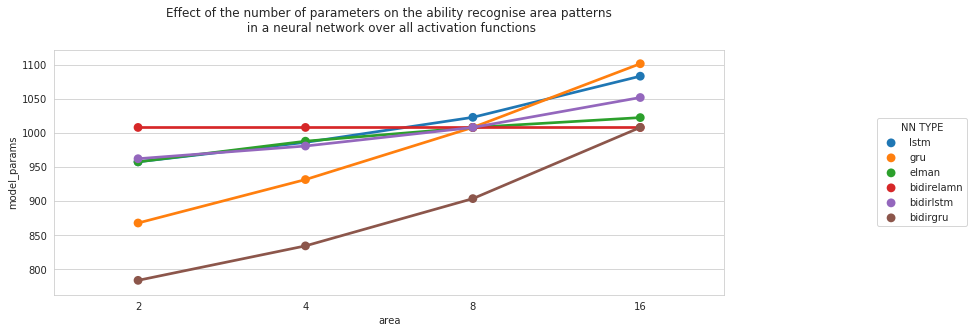

In [7]:
from matplotlib import pyplot
def plot_by_filter(x_col, 
                   y_col, 
                   x_label='Sparsity length',
                   y_label='Number of network parameters',
                   title="Effect of sparsity on the number of parameters \n in a neural network with activation ", 
                   hue="network_type", 
                   filter_col="activation_function", 
                   filter_val="tanh",
                   legend_title="NN TYPE",
                  df=None):
    sns.set_style("whitegrid")
    a4_dims = (12, 4.5)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax.set(xlabel=x_label, 
       ylabel=y_label )
    if filter_val is not None:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  markersize=5, ci=None,
                          data = df[df[filter_col] == filter_val])
       
        ax.axes.set_title(title + filter_val,
                          fontsize=12, y=1.05)
        ax.legend(title=filter_val.upper(), loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)
    else:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  markersize=5, ci=None,
                          data = df)
        ax.axes.set_title(title, fontsize=12, y=1.05)
        ax.legend(title=legend_title, loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)

    # plt.legend()
filter_col = "nn_type"
filter_1 = "area"
x_col = "area"
x_label = "Area of Patterns"
plot_by_filter(x_col=x_col, 
               y_col="model_params",
               x_label="Area of pattern retained",
               y_label='Number of network parameters',
               title="Effect of the number of parameters on the ability recognise area patterns" + 
                       "\n in a neural network over all activation functions", 
               hue="nn_type",
              filter_col=filter_col, filter_val=None, df=df)    

### Correlation

In [8]:
filter_col = "nn_type"
filter_col_1 = x_col
for filter_val in df[filter_col].unique():
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby([x_col, "nn_type"]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[x_col] = df_temp[x_col].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print("Pearson Correlation Between "+x_label+" length and Number of Network Parameters for", filter_val, df_temp[x_col].corr(df_temp["model_params"]))

Pearson Correlation Between Area of Patterns length and Number of Network Parameters for lstm 0.9935516646157746
Pearson Correlation Between Area of Patterns length and Number of Network Parameters for gru 0.9797302567574829
Pearson Correlation Between Area of Patterns length and Number of Network Parameters for elman 0.9014445693435437
Pearson Correlation Between Area of Patterns length and Number of Network Parameters for bidirelamn nan
Pearson Correlation Between Area of Patterns length and Number of Network Parameters for bidirlstm 0.9953379095118366
Pearson Correlation Between Area of Patterns length and Number of Network Parameters for bidirgru 0.992260489083738


### Pattern Length retention

In [9]:
df_cap = df.groupby(["nn_type"]).agg({"model_params" : "sum", "area": "sum"})
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
df_cap

,model_params,area,capacity_ratio
nn_type,,,
bidirelamn,414288,4194,0.010123
bidirgru,298872,2888,0.009663
bidirlstm,402192,3492,0.008682
elman,413784,4140,0.010005
gru,407736,3708,0.009094
lstm,397656,3452,0.008681


## 2. Investigate which activation function lead to the highest retention of length of pattern

In [10]:
filter_col = "activation_func"
filter_col_1 = x_col
for filter_val in df[filter_col].unique():
    df_temp = df[(df[filter_col] == filter_val)]
    df_temp = df_temp.groupby([filter_col_1]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[filter_col_1] = df_temp[filter_col_1].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print("Pearson Correlation Between "+x_label+" and Number of Network Parameters for", filter_val, df_temp[filter_col_1].corr(df_temp["model_params"]))

Pearson Correlation Between Area of Patterns and Number of Network Parameters for softmax -0.05383819020581655
Pearson Correlation Between Area of Patterns and Number of Network Parameters for elu 0.8729700399970431
Pearson Correlation Between Area of Patterns and Number of Network Parameters for selu 0.8379504663328747
Pearson Correlation Between Area of Patterns and Number of Network Parameters for softplus 0.9815096834376721
Pearson Correlation Between Area of Patterns and Number of Network Parameters for softsign 0.9311257800906042
Pearson Correlation Between Area of Patterns and Number of Network Parameters for tanh 0.9101894535372166
Pearson Correlation Between Area of Patterns and Number of Network Parameters for sigmoid 0.9982167189754395
Pearson Correlation Between Area of Patterns and Number of Network Parameters for hard_sigmoid nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for relu 0.9329832860011813
Pearson Correlation Between Area of Pa

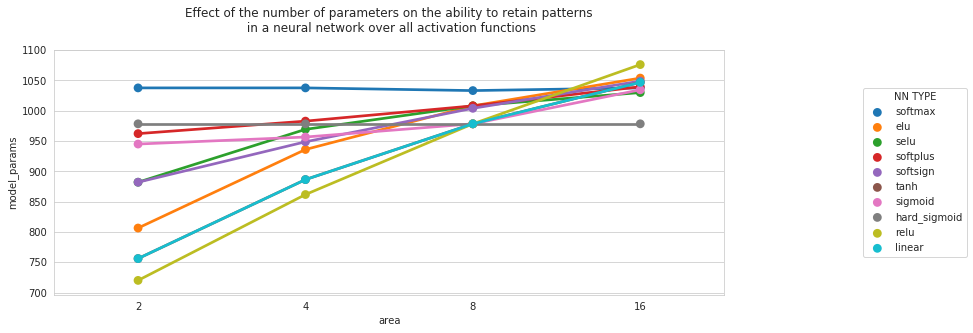

In [11]:
filter_col = "activation_func"
filter_1 = "area"
x_col = "area"
x_label = "Number of Patterns"
plot_by_filter(x_col=x_col, 
               y_col="model_params",
               x_label=x_label,
               y_label='Number of network parameters',
               title="Effect of the number of parameters on the ability to retain patterns" + 
                       "\n in a neural network over all activation functions", 
               hue="activation_func",
              filter_col=filter_col, filter_val=None, df=df)    

### Correlation of activation functions  ∝ length of pattern

In [12]:
df[filter_col].unique()

array(['softmax', 'elu', 'selu', 'softplus', 'softsign', 'tanh',
       'sigmoid', 'hard_sigmoid', 'relu', 'linear'], dtype=object)

In [13]:
filter_col = "activation_func"
df_correlation_matrix = pd.DataFrame(columns=df["nn_type"].unique())
df_correlation_matrix["activation_func"] = df[filter_col].unique()
df_correlation_matrix.index =  df_correlation_matrix["activation_func"]
del df_correlation_matrix["activation_func"]
for filter_val in df[filter_col].unique():
    for filter_val_1 in df["nn_type"].unique():
        df_temp = df[(df["nn_type"] == filter_val_1) & (df["activation_func"] == filter_val)]
        df_temp = df_temp.groupby(["area"]).agg({"model_params": "mean"}).to_records()
        df_temp = pd.DataFrame.from_records(df_temp)
        df_temp[x_col] = df_temp[filter_col_1].astype(float)
        df_temp["model_params"] = df_temp["model_params"].astype(float)
        df_correlation_matrix.at[filter_val, filter_val_1] =   df_temp[filter_col_1].corr(df_temp["model_params"])
        print("Pearson Correlation Between "+x_label+" and Number of Network Parameters for", filter_val_1 + " "+ filter_val, df_temp[filter_col_1].corr(df_temp["model_params"]))

Pearson Correlation Between Number of Patterns and Number of Network Parameters for lstm softmax -0.05383819020581655
Pearson Correlation Between Number of Patterns and Number of Network Parameters for gru softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for elman softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for bidirelamn softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for bidirlstm softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for bidirgru softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for lstm elu 0.9014445693435439
Pearson Correlation Between Number of Patterns and Number of Network Parameters for gru elu nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for elman elu -0.9014445693435439
Pearson Correlation Between Number of Pa

In [14]:
df_correlation_matrix

,lstm,gru,elman,bidirelamn,bidirlstm,bidirgru
activation_func,,,,,,
softmax,-0.0538382,NaN,NaN,NaN,NaN,NaN
elu,0.901445,NaN,-0.901445,NaN,0.989053,0.901445
selu,-0.901445,0.901445,NaN,NaN,NaN,0.989053
softplus,NaN,NaN,0.901445,NaN,NaN,NaN
softsign,NaN,0.901445,NaN,NaN,NaN,0.876298
tanh,0.989053,0.901445,NaN,NaN,NaN,0.959166
sigmoid,NaN,NaN,0.989053,NaN,NaN,NaN
hard_sigmoid,NaN,NaN,NaN,NaN,NaN,NaN
relu,0.901445,0.989053,NaN,NaN,0.989053,NaN


### Sequence Length Capacity

In [15]:
df_cap = df.groupby(["nn_type", "activation_func"]).agg({"model_params" : "sum", "area": "sum"})
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
df_cap = pd.DataFrame(df_cap.to_records())
df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap

nn_type,bidirelamn,bidirgru,bidirlstm,elman,gru,lstm
activation_func,,,,,,
elu,0.011054,0.009897,0.008818,0.010141,0.011054,0.009897
hard_sigmoid,0.007784,0.010379,0.007784,0.007784,0.007784,0.007784
linear,0.011054,0.012485,0.008929,0.011054,0.009897,0.008818
relu,0.011054,0.010379,0.008818,0.011054,0.008818,0.009897
selu,0.011054,0.008818,0.011054,0.011054,0.009897,0.010141
sigmoid,0.007784,0.010379,0.007784,0.008818,0.007784,0.007784
softmax,0.007784,0.007784,0.007784,0.007784,0.007784,0.006373
softplus,0.011054,0.007784,0.008929,0.009897,0.007784,0.008929
softsign,0.011054,0.010028,0.007784,0.011054,0.009897,0.007784


            # TOTOTOTOTOTODOODODODODOODODODO

## 3. Relationship between the length of pattern and number of layers

In [16]:
df["num_layers"] = df["nodes_in_layer"].apply(len)
df.groupby(["num_layers", "model_params"]).agg({"area": "mean"})

area
num_layers model_params          
1          504           8.788265
           1008          9.610358
           1512          9.690027

In [17]:
df_cap = df.groupby(["nn_type", "activation_func", "num_layers"]).agg({"model_params" : "sum", "area": "sum"})
df_cap = pd.DataFrame(df_cap.to_records())
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
# df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap

,nn_type,activation_func,num_layers,model_params,area,capacity_ratio
0,bidirelamn,elu,1,42336,468,0.011054
1,bidirelamn,hard_sigmoid,1,39312,306,0.007784
2,bidirelamn,linear,1,42336,468,0.011054
3,bidirelamn,relu,1,42336,468,0.011054
4,bidirelamn,selu,1,42336,468,0.011054
5,bidirelamn,sigmoid,1,39312,306,0.007784
6,bidirelamn,softmax,1,39312,306,0.007784
7,bidirelamn,softplus,1,42336,468,0.011054
8,bidirelamn,softsign,1,42336,468,0.011054
9,bidirelamn,tanh,1,42336,468,0.011054


#### Num layers = 1

In [18]:
df_cap[df_cap["num_layers"] == 1].pivot(index="activation_func", columns="nn_type", values="capacity_ratio")

nn_type,bidirelamn,bidirgru,bidirlstm,elman,gru,lstm
activation_func,,,,,,
elu,0.011054,0.009897,0.008818,0.010141,0.011054,0.009897
hard_sigmoid,0.007784,0.010379,0.007784,0.007784,0.007784,0.007784
linear,0.011054,0.012485,0.008929,0.011054,0.009897,0.008818
relu,0.011054,0.010379,0.008818,0.011054,0.008818,0.009897
selu,0.011054,0.008818,0.011054,0.011054,0.009897,0.010141
sigmoid,0.007784,0.010379,0.007784,0.008818,0.007784,0.007784
softmax,0.007784,0.007784,0.007784,0.007784,0.007784,0.006373
softplus,0.011054,0.007784,0.008929,0.009897,0.007784,0.008929
softsign,0.011054,0.010028,0.007784,0.011054,0.009897,0.007784


#### Num layers = 2

In [19]:
df_cap[df_cap["num_layers"] == 2].pivot(index="activation_func", columns="nn_type", values="capacity_ratio")

nn_type
activation_func


### Conclusion about capacity?